# Derek McCrary
**Course**: CS 82B - Principles of Data Science
**Date**: May 18, 2025

# Module 6 KNN Assignment




## 1st Review Demo Code Provided 
## 2nd Follow the below instructions to code your KNN model 

### Import required Python Libraries for Lab

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection

## KNN Demo Code:

### Load the Cancer Dataset

The following dataset is from the [UCI ML Breast Cancer Wisconsin (Diagnostic) dataset](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)). The dataset includes mammography exam results and cancer reslts.

In [2]:
cancer_dataset = datasets.load_breast_cancer()
df = pd.DataFrame(data=cancer_dataset.data, columns=cancer_dataset.feature_names)
df['TARGET'] = cancer_dataset.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TARGET
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Selecting Features 

To streamline our KNN model fitting process, we'll use the "mean radius" and "mean texture" features to train our classifier for predicting the presence of breast cancer in patients.

In [3]:
# Let's slice our dataset to focus only on the features we'll be utilizing.
df[["mean radius","mean texture", "TARGET"]]

,mean radius,mean texture,TARGET
0,17.99,10.38,0
1,20.57,17.77,0
2,19.69,21.25,0
3,11.42,20.38,0
4,20.29,14.34,0
...,...,...,...
564,21.56,22.39,0
565,20.13,28.25,0
566,16.60,28.08,0
567,20.60,29.33,0


### Visualization of Features

As we're developing a classifier, it may prove helpful to examine some of the features/variables. In the following analysis, we'll investigate the relationship between "mean radius" and "mean texture" and their potential correlation with cancer detection.

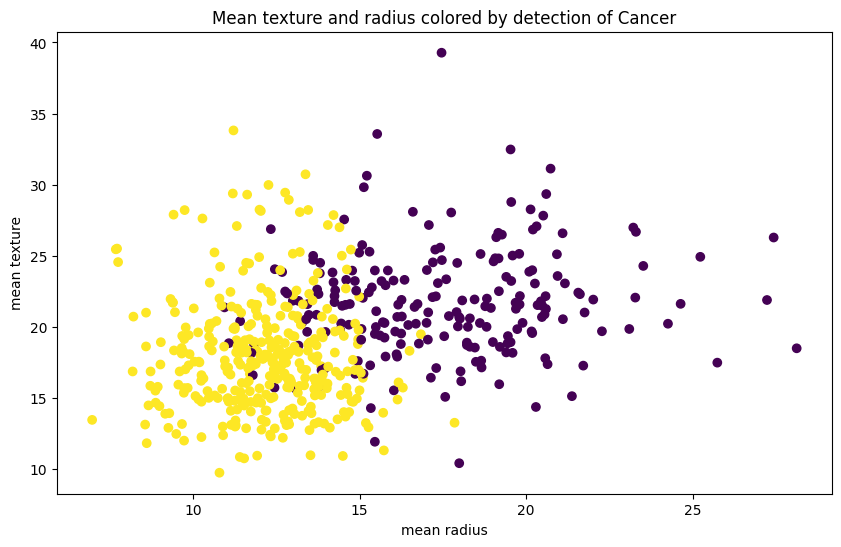

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(df["mean radius"], df["mean texture"], c=df["TARGET"])
plt.title("Mean texture and radius colored by detection of Cancer")
plt.xlabel("mean radius")
plt.ylabel("mean texture")
plt.show()

### Split data to create two dataframes. One for training the model and the second for testing data


The train_test_split method is a function in machine learning libraries like Scikit-learn that splits a given dataset into training and testing sets. This is an essential step in the machine learning workflow, as it allows us to evaluate the performance of our model on new, unseen data.

The method takes as input the feature matrix X and the target vector y that we want to split. It also takes the test_size parameter, which specifies the proportion of the dataset to include in the testing set. For example, a test_size of 0.3 means that 30% of the data will be used for testing, while the remaining 70% will be used for training.

Additionally, the train_test_split method can also take other parameters such as random_state, which is used to set the random seed for reproducibility, and stratify, which ensures that the proportion of classes in the training and testing sets is the same as the proportion in the original dataset.

The method returns four arrays: X_train, X_test, y_train, and y_test. The X_train and y_train arrays are used for training the model, while the X_test and y_test arrays are used for evaluating the model's performance on new, unseen data.

By splitting the dataset into training and testing sets, we can train our model on one set of data and then evaluate its performance on a separate set of data, which helps us to detect overfitting and ensures that our model is able to generalize well to new, unseen data.

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[["mean radius","mean texture"]],
                                                                    df[["TARGET"]], test_size=0.2, random_state=42)

### Import an ML algorithm sklearn KNeighborsClassifier

In [6]:
# import the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

### Initialize the Model

We are setting the hyperparameter `n_neighbors` to 4. 
This number can be changed. Different n_neighbor values can change the accurancy of the model. Give it a try! Change n_neighbor!

The line model = KNeighborsClassifier(n_neighbors = 4) creates an instance of the KNeighborsClassifier class from the Scikit-learn machine learning library and assigns it to the variable model.

The KNeighborsClassifier is a type of supervised learning algorithm used for classification tasks. It works by finding the k nearest neighbors to a given data point in the feature space and assigning the class label of the majority of those neighbors to the data point being classified. The value of k is specified by the n_neighbors parameter, which is set to 4 in this example.

By creating an instance of the KNeighborsClassifier class with n_neighbors = 4, we're initializing a model that will classify data points by considering the class labels of their four nearest neighbors in the feature space. We can then use this model to make predictions on new, unseen data.

In [8]:
# Initialize the Model
model = KNeighborsClassifier(n_neighbors = 4)

### Fit the new model. 

The line model.fit(X_train, y_train) trains the KNeighborsClassifier model created earlier using the training set X_train and corresponding target variable y_train.

The fit() method is a built-in method of the Scikit-learn estimator objects, including the KNeighborsClassifier class. It takes the feature matrix X_train and target vector y_train as input and fits the model to the training data by calculating the distance between each data point and its k nearest neighbors in the feature space.

During the training process, the model adjusts its internal parameters (i.e., weights or coefficients) to minimize the difference between the predicted values and the actual target values in the training set. This process is known as parameter estimation or model training.

After the training is complete, the model object stores the learned parameters, which can be used to make predictions on new, unseen data using the predict() method.

In [9]:
# Fit the model
model.fit(X_train, y_train)

/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

### Test the model by making a prediction

The line pred = model.predict(X_test) uses the trained KNeighborsClassifier model to make predictions on the test set X_test and assigns the predicted values to the pred variable.

The predict() method is a built-in method of the Scikit-learn estimator objects, including the KNeighborsClassifier class. It takes the feature matrix X_test as input and returns the predicted target values based on the learned parameters of the model.

In other words, for each data point in the test set, the predict() method uses the internal parameters of the trained model to classify the data point based on the class labels of its k nearest neighbors in the feature space. It then returns the predicted target value for that data point.

After the predictions have been made for the test set, the predicted values are assigned to the pred variable for later analysis and evaluation of the model's performance on the test set.

In [10]:
# Predict
pred = model.predict(X_test)

### Visualize Data and boundary

A colormesh plot to show the decision boundary of the KNN model.


/Volumes/DevDereks/opt/anaconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


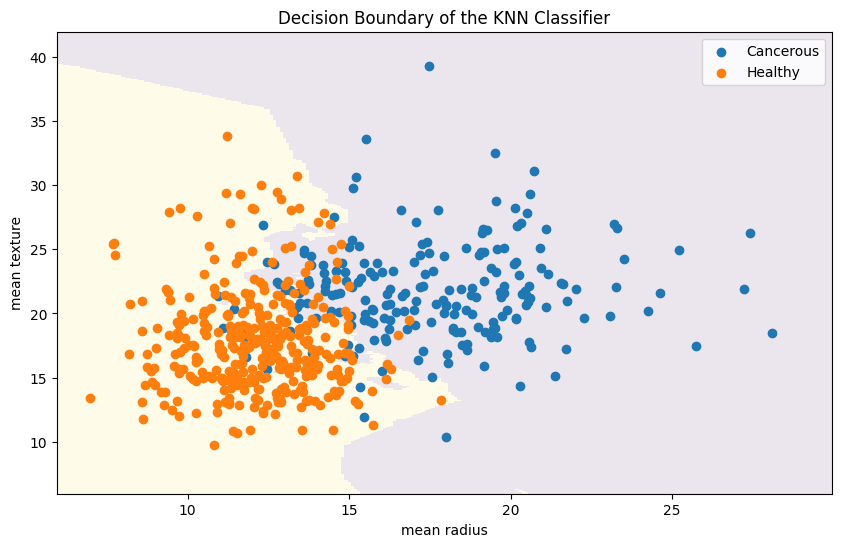

In [11]:
# Make the same scatter plot of the training data

fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(6, 30, 0.1),
                     np.arange(6, 42, 0.1))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.1)

for label, data in df.groupby('TARGET'):
  ax.scatter(data["mean radius"], data["mean texture"], label=["Cancerous","Healthy"][label])

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.legend()
plt.show()

### The below code test the accuracy the model

This code block is used to evaluate the performance of the trained KNeighborsClassifier model on the test set, specifically by computing the mean squared error, accuracy score, and classification report.

mean_squared_error(y_test, pred) computes the mean squared error between the true target values in the test set y_test and the predicted values pred. This metric measures the average squared difference between the predicted and true values, and a lower value indicates better performance.

accuracy_score(y_test, pred) computes the accuracy of the model by comparing the predicted target values pred with the true target values in the test set y_test. The accuracy is the proportion of correctly classified samples, and a higher value indicates better performance.

classification_report(y_test, pred) generates a text report that summarizes the precision, recall, and F1-score for each class in the target variable. This report provides a more detailed evaluation of the model's performance on each class.

By printing these metrics, we can evaluate the performance of the model on the test set and determine how well it is able to generalize to new, unseen data. These metrics can be used to compare different models and select the best one for the task at hand.

In [12]:
# Evaluation of accuracy
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score
print('Mean squared error: ', mean_squared_error(y_test, pred))
print("Accuracy Score: ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Mean squared error:  0.09649122807017543
Accuracy Score:  0.9035087719298246
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        43
           1       0.95      0.89      0.92        71

    accuracy                           0.90       114
   macro avg       0.89      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



### Use the Model with new data


1. Given a patient with a mean radius of 14.2 and a mean texture of 30.3, is it probable that the patient has breast cancer?
2. Would a patient with a mean radius of 11.2 and a mean texture of 33.6 be likely to have breast cancer?


In [13]:
patient1 = pd.DataFrame([[14.2, 30.3]], columns=["mean radius", "mean texture"])
prediction = model.predict(patient1)[0]
print(f"Patient 1 {['is likely', 'is not likely'][prediction]} to have cancer")

patient2 = pd.DataFrame([[11.2, 33.6]], columns=["mean radius", "mean texture"])
prediction = model.predict(patient2)[0]
print(f"Patient 2 {['is likely', 'is not likely'][prediction]} have cancer")

Patient 1 is likely to have cancer
Patient 2 is not likely have cancer


## Module 6 Assignment: Your Turn KNN


### Import the below required Python Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection

### Load the UCI Wine Dataset

The given dataset is sourced from the UCI ML Wine Recognition dataset and presents the outcomes of a chemical analysis of wines that were grown in the same area in Italy using three distinct grape cultivars. Your task is to create a new column TARGET that corresponds to the target column of the load_wine() data and to construct a model that can forecast the cultivar (grape type) that the wine was produced from.

In [15]:
wine_dataset = datasets.load_wine()

df = pd.DataFrame(data=wine_dataset.data, columns=wine_dataset.feature_names)
df['TARGET'] = wine_dataset.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,TARGET
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### Feature Selection

To simplify the model, train the KNN classifier by utilizing the features of "malic_acid" and "color_intensity". This will aid in predicting the grape cultivar that the wine has originated from.

In [18]:

# Use pandas to extract the features we care about
from sklearn.datasets import load_wine
import pandas as pd

# Load the wine dataset 
wine = load_wine()

# Create a DataFrame from the dataset
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

# Add the target variable to the DataFrame
df['target'] = wine.target

features = df[['malic_acid', 'color_intensity']]
target = df['target'] = wine.target # assuming the target column is already added

### Visualize the features selected for model 

Create a scatter() graph of the features, `"malic acid"` and  `"color intensity"`, and see if there is a correlation with the cultivar number.

Use the `c` value color the dots by target class.

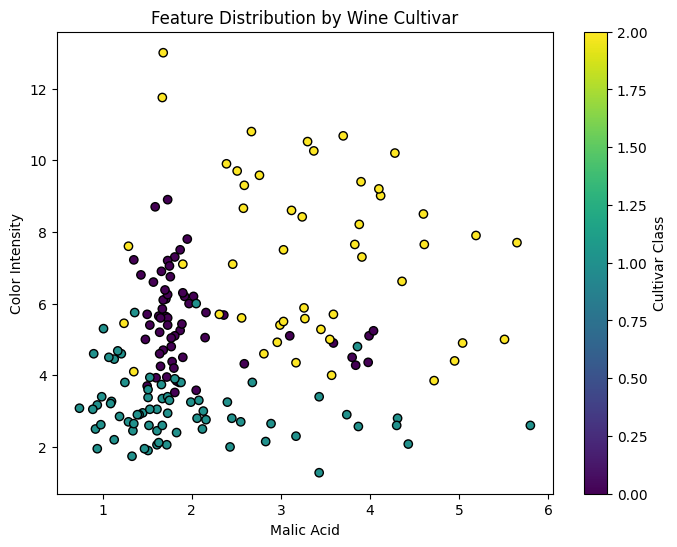

In [19]:
# ADD CODE HERE
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['malic_acid'], df['color_intensity'], c=df['target'], cmap='viridis', edgecolor='k')
plt.xlabel('Malic Acid')
plt.ylabel('Color Intensity')
plt.title('Feature Distribution by Wine Cultivar')
plt.colorbar(label='Cultivar Class')
plt.show()

### Split dataset into training and testing data



In [20]:
# Sample Code provided - Add the features and target 
# X_train, X_test, y_train, y_test = model_selection.train_test_split(df[[ADD CODE HERE]],df[[ADD CODE HERE]], test_size=0.2, random_state=42)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[['malic_acid', 'color_intensity']],
    df['target'],
    test_size=0.2,
    random_state=42
)

### Import Sklearn Algorithms KNeighborsClassifier
 

In [21]:
# import the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

### Initialize the Model

Set hyperparameter `n_neighbors = 4`.

In [22]:
knn = KNeighborsClassifier(n_neighbors=4)

### Fit the Model Hint: fit()

In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [24]:
# Use predict() on model
pred = knn.predict(X_test)

### Use the provided code to test the accuracy

Display the:
`mean_squared_error`, `classification_report`, and `accuracy_score`.

### ADD COMMENT HERE: Explain the below code.

In [ ]:
# This code checks how good our model is.
# It shows how many predictions were right or wrong,
# and gives more details about how the model did for each class.
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score

 
print('Mean squared error: ', mean_squared_error(y_test, pred))
print("Accuracy Score: ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

### Use your new model


Which cultivated probably created a wine with `malic_acid = 4.1` and `color_intensity = 1.1` ?

In [26]:
wine1 = pd.DataFrame([[4.1, 1.1]], columns=["malic_acid", "color_intensity"])
prediction = knn.predict(wine1)[0]
print(f"Wine 1 was likely created by cultivator {prediction + 1}")

Wine 1 was likely created by cultivator 2


Which cultivated probably created a wine with `malic_acid = 5.3` and `color_intensity = 8.1` ?

In [27]:
wine2 = pd.DataFrame([[5.3, 8.1]], columns=["malic_acid", "color_intensity"])
prediction2 = knn.predict(wine2)[0]
print(f"Wine 2 was likely created by cultivator {prediction2 + 1}")

Wine 2 was likely created by cultivator 3
